## Main Objective

We are going to center our efforts in improving the classification model to be able to classify new (unlabeled) reviews.

Having this in mind, we consider that we have to make a model that predict in the best way possible the negative reviews (True Negative - 0 values), having the smaller number of false positive reviews.

With this someone could see what to improve based on the negative reviews.

That doesn't mean that we are going to have a small detection on positive reviews.

In [159]:
#Importing Libraries
import pandas as pd
import numpy as np

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer
import re

from sklearn.feature_extraction.text import CountVectorizer #Class that allows tokenization

# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
#!pip install tabulate
from tabulate import tabulate
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix

from textblob import TextBlob

In [259]:
#Read Dataset
dataset = pd.read_csv('Seven_Sins_Restobar.tsv', delimiter = '\t', quoting = 3, encoding = 'unicode_escape')
dataset

Review  Liked
0    "I also had to taste my Mom's multi-grain pump...      1
1            "I'd rather eat airline food, seriously."      0
2        Cant say enough good things about this place.      1
3                         The ambiance was incredible.      1
4            The waitress and manager are so friendly.      1
..                                                 ...    ...
495  "Worse of all, he humiliated his worker right ...      0
496                    CONCLUSION: Very filling meals.      1
497  Their daily specials are always a hit with my ...      1
498  The pancake was also really good and pretty la...      1
499  "This was my first crawfish experience, and it...      1

[500 rows x 2 columns]

### Dataset review

- The reviews don't follow any kind of standard way of writing
- Having in mind the quantity of observations is going to be hard to do any kind of filtering
- Some of the reviews have quotes
- As far as we can see, most of the reviews have a clear polarity based on the words used (See if Textblob help with something)

### Pre-processing steps and methods

- Standarize the reviews by keeping only letters
- Transform letters to lower case
- Drop stopwords
- See the difference (in the results) between applying lemmatizer, stemming and nothing to the words

- After getting the list of different words per observation create an SparseMatrix (could be good if we look for ways to optimize an SparseMatrix if there's time)

In [284]:
# Cleaning the texts and eliminate stopwords

corpus = [] 

for i in range(0, 500):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i]) #Removes all but letters (and Capitals)
    review = review.lower() #Put all the letters in lowercase
    review = review.split() #Creates a list of different words
    review = [word for word in review if not word in set(stopwords.words('english'))] #Drop stopwords
    review = ' '.join(review) #For reversing the process (list -> string)
    corpus.append(review) #Generate a list of one string per observation
    
corpus

['also taste mom multi grain pumpkin pancakes pecan butter amazing fluffy delicious',
 'rather eat airline food seriously',
 'cant say enough good things place',
 'ambiance incredible',
 'waitress manager friendly',
 'would recommend place',
 'overall impressed noca',
 'gyro basically lettuce',
 'terrible service',
 'thoroughly disappointed',
 'much pasta love homemade hand made pastas thin pizzas',
 'give try happy',
 'far best cheesecurds ever',
 'reasonably priced also',
 'everything perfect night',
 'food good typical bar food',
 'drive get',
 'first glance lovely bakery cafe nice ambiance clean friendly staff',
 'anyway think go back',
 'point finger item menu order disappointed',
 'oh thing beauty bar',
 'gone go',
 'greasy unhealthy meal',
 'first time might last',
 'burgers amazing',
 'similarly delivery man say word apology food minutes late',
 'way expensive',
 'sure order dessert even need pack go tiramisu cannoli die',
 'first time wait next',
 'bartender also nice',
 'ever

In [295]:
# Cleaning the texts and use Lemmatizer

#Execute this and no the other cleaning to get the best results!!!!
corpus = [] 

for i in range(0, 500):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i]) #Removes all but letters (and Capitals)
    review = review.lower() #Put all the letters in lowercase
    review = review.split() #Creates a list of different words
    wordnet_lemmatizer = WordNetLemmatizer() #We use lemmatizer for taking the root of words
    review = [wordnet_lemmatizer.lemmatize(word) 
              for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review) #For reversing the process (list -> string)
    corpus.append(review) #Generate a list of one string per observation
    
corpus

['also taste mom multi grain pumpkin pancake pecan butter amazing fluffy delicious',
 'rather eat airline food seriously',
 'cant say enough good thing place',
 'ambiance incredible',
 'waitress manager friendly',
 'would recommend place',
 'overall impressed noca',
 'gyro basically lettuce',
 'terrible service',
 'thoroughly disappointed',
 'much pasta love homemade hand made pasta thin pizza',
 'give try happy',
 'far best cheesecurds ever',
 'reasonably priced also',
 'everything perfect night',
 'food good typical bar food',
 'drive get',
 'first glance lovely bakery cafe nice ambiance clean friendly staff',
 'anyway think go back',
 'point finger item menu order disappointed',
 'oh thing beauty bar',
 'gone go',
 'greasy unhealthy meal',
 'first time might last',
 'burger amazing',
 'similarly delivery man say word apology food minute late',
 'way expensive',
 'sure order dessert even need pack go tiramisu cannoli die',
 'first time wait next',
 'bartender also nice',
 'everything

In [165]:
# Cleaning the texts and use Porter Stemmer

corpus = [] 

for i in range(0, 500):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i]) #Removes all but letters (and Capitals)
    review = review.lower() #Put all the letters in lowercase
    review = review.split() #Creates a list of different words
    ps = PorterStemmer() #We use Stemming for taking the root of words
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review) #For reversing the process (list -> string)
    corpus.append(review) #Generate a list of one string per observation
    
corpus

['also tast mom multi grain pumpkin pancak pecan butter amaz fluffi delici',
 'rather eat airlin food serious',
 'cant say enough good thing place',
 'ambianc incred',
 'waitress manag friendli',
 'would recommend place',
 'overal impress noca',
 'gyro basic lettuc',
 'terribl servic',
 'thoroughli disappoint',
 'much pasta love homemad hand made pasta thin pizza',
 'give tri happi',
 'far best cheesecurd ever',
 'reason price also',
 'everyth perfect night',
 'food good typic bar food',
 'drive get',
 'first glanc love bakeri cafe nice ambianc clean friendli staff',
 'anyway think go back',
 'point finger item menu order disappoint',
 'oh thing beauti bar',
 'gone go',
 'greasi unhealthi meal',
 'first time might last',
 'burger amaz',
 'similarli deliveri man say word apolog food minut late',
 'way expens',
 'sure order dessert even need pack go tiramisu cannoli die',
 'first time wait next',
 'bartend also nice',
 'everyth good tasti',
 'place two thumb way',
 'best place vega break

In [297]:
cv = CountVectorizer(max_features = 2000) #Keepong the 1000 more frequent words

X = cv.fit_transform(corpus).toarray() #Creation of the Sparsematrix

y = dataset.iloc[:, 1].values #Defining our response variable

In [298]:
#Add subjectivity and polarity to the SparseMatrix
#We use the reviews without any change
subj = []
pol = []
for i in dataset['Review'].to_numpy():
    testimonial = TextBlob(i)
    pol.append(testimonial.sentiment.polarity)
    subj.append(testimonial.sentiment.subjectivity)
    
pol = np.asarray(pol)[...,None] #[...,None] to make pol a 2-dim array
subj = np.asarray(subj)[...,None]

new_X = np.append(X,pol,1)
new_X = np.append(new_X,subj,1)


#new_X = np.append(subj,pol,1) #Try just the pol and subj without SparseMatrix

#Trying to get only values different from 0


#aux_y = y[...,None]
#new_X = np.append(new_X,aux_y,1)
#aux = new_X[new_X[:,1141]!=0]
#
#aux_2 = new_X[new_X[:,1141]<-0.2]
#aux_y = aux[:,1143]
#aux = np.delete(aux,1143,1)
#print(np.shape(aux))
print(np.shape(new_X))

(500, 1143)


#### (*)There's a difference between the total number of words between the three methods used (lemma, stem and nothing)

## Models
- Naive Bayes Classification
- Logistic Regression

In [299]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size = 0.20, random_state = 0)

# Fitting Naive Bayes to the Training set

classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

# fit a Logistic Regression Model
classifier_lr = LogisticRegression(solver='lbfgs')
classifier_lr.fit(X_train, y_train)

# Predicting the Test set results
nb_y_pred = classifier_nb.predict(X_test)
lr_y_pred = classifier_lr.predict(X_test)

# Making the Confusion Matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)
print(nb_cm)
lr_cm = confusion_matrix(y_test, lr_y_pred)
print(lr_cm)

[[26 24]
 [ 5 45]]
[[37 13]
 [ 7 43]]


No Skill: ROC AUC=0.500
Naive Bayes: ROC AUC=0.723
Logistic: ROC AUC=0.844

No Skill


threshold  tpr  fpr
0          1  0.0  0.0
1          0  1.0  1.0

Bayes


threshold   tpr   fpr
0  2.000000e+00  0.00  0.00
1  1.000000e+00  0.90  0.46
2  4.200427e-04  0.90  0.50
3  1.871111e-10  0.92  0.50
4  0.000000e+00  1.00  1.00

Logic


threshold   tpr   fpr
0    1.998985  0.00  0.00
1    0.998985  0.02  0.00
2    0.976593  0.06  0.00
3    0.970253  0.06  0.02
4    0.917001  0.24  0.02
5    0.909284  0.24  0.04
6    0.906772  0.28  0.04
7    0.896256  0.28  0.08
8    0.810171  0.48  0.08
9    0.810076  0.48  0.10
10   0.792012  0.52  0.10
11   0.773652  0.52  0.12
12   0.767162  0.54  0.12
13   0.764717  0.54  0.14
14   0.676558  0.72  0.14
15   0.668145  0.72  0.16
16   0.654150  0.74  0.16
17   0.634705  0.74  0.20
18   0.618861  0.78  0.20
19   0.615456  0.78  0.22
20   0.614647  0.80  0.22
21   0.610033  0.80  0.24
22   0.514829  0.86  0.24
23   0.512639  0.86  0.26
24   0.488073  0.88  0.26
25   0.427887  0.88  0.32
26   0.415841  0.90  0.34
27   0.412814  0.90  0.38
28   0.383313  0.92  0.38
29   0.370208  0.92  0.42
30   0.360371  0.94  0.42
31   0.334272  0.94  0.48
32   0.327722  0.96  0.48
33   0.096481  0.96  0.80
34   0.089816  0.98  0.80
35   0.009998  0.98  0.98
36   0.009814  1.00  0.98
37   0.009035  1.00  1.00

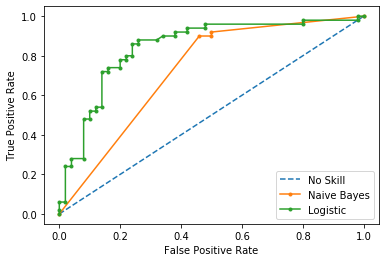

In [263]:
# predict probabilities
nb_probs = classifier_nb.predict_proba(X_test)
lr_probs = classifier_lr.predict_proba(X_test)

# keep probabilities for the positive outcome only
ns_probs = [0 for _ in range(len(y_test))]
nb_probs = nb_probs[:, 1]
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Naive Bayes: ROC AUC=%.3f' % (nb_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, ns_thresholds  = roc_curve(y_test, ns_probs)
nb_fpr, nb_tpr, nb_thresholds  = roc_curve(y_test, nb_probs)
lr_fpr, lr_tpr, lr_thresholds  = roc_curve(y_test, lr_probs)

#get roc curve metrics
from IPython.display import display

print('\nNo Skill')
ns_df = pd.DataFrame(data=[])
ns_df['threshold'] = ns_thresholds
ns_df['tpr'] = ns_tpr
ns_df['fpr'] = ns_fpr
display(ns_df)

print('Bayes')
nb_df = pd.DataFrame(data=[])
nb_df['threshold'] = nb_thresholds
nb_df['tpr'] = nb_tpr
nb_df['fpr'] = nb_fpr
display(nb_df)

print('Logic')
lr_df = pd.DataFrame(data=[])
lr_df['threshold'] = lr_thresholds
lr_df['tpr'] = lr_tpr
lr_df['fpr'] = lr_fpr
display(lr_df)

# plot the roc curve for the model

fig, ax1 = pyplot.subplots()

ax1.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
ax1.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes')
ax1.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

In [300]:
nb_probs = classifier_nb.predict_proba(X_test)
lr_probs = classifier_lr.predict_proba(X_test)

new_pred = []

for i in lr_probs[:,1]:
    if i<0.488073:
        new_pred.append(0)
    else:
        new_pred.append(1)

new_pred = np.asarray(new_pred)

lr_cm = confusion_matrix(y_test, new_pred)
print(lr_cm)


#Best model at the moment with 81% accuracy on test
#Use Lemma instead of stem
#Logistic Regression
#Polarity and subjectivity without changes
#1150 words SparseMatrix (Max is less than this)
#Cut off value of 0.488073 or 0.514829... Have to evaluate which is better

[[37 13]
 [ 6 44]]


### Results
- The best result is achieved by using a Logistic Regression as described in the previous cell
- We think that is better to use a cutoff value of 0.514829 because it improves the classification of Negative reviews


### Try different methods (just in case)
- SVM
- KNN

In [293]:
from sklearn.svm import SVC
clf = SVC(gamma='auto', random_state=0, C=100)
clf.fit(X_train, y_train)
svm_pred = clf.predict(X_test)

svm_cm = confusion_matrix(y_test, svm_pred)
print(svm_cm)

[[37 13]
 [ 8 42]]


In [294]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

knn_pred = neigh.predict(X_test)

knn_cm = confusion_matrix(y_test, knn_pred)
print(knn_cm)

[[35 15]
 [10 40]]


#### Logistic regression keeps giving better results